In [12]:
%cd '../HOTS'
from Tools import runjit, netparam, histoscore, histoscore_lagorce
import numpy as np

/home/antoine/homhots/HOTS/HOTS


In [13]:
sigma = None
pooling = False
homeinv = False
jitonic = [None,None] #[temporal, spatial]
jitter = False
R = 2
nbclust = [4,8,16]
filt = 2


timestr = '2021-03-28'
record_path = '../Records/EXP_05_POKERDVS/'
dataset = 'poker'
nb_test = 20
nb_train = 48
ds = 1

nb_test = nb_test//ds
nb_train = nb_train//ds
print(f'training set size: {nb_train} - testing set: {nb_test}')

training set size: 48 - testing set: 20


In [14]:
verbose=False
JS_score = []
JS_scorehom = []
JS_score_histav = []
JS_scorehom_histav = []
BA_score = []
BA_scorehom = []
BA_score_histav = []
BA_scorehom_histav = []
kNN6_score = []
kNN6_scorehom = []
kNN3_score = []
kNN3_scorehom = []

tauz = [0.01,0.1,0.2,0.4,0.6,0.8,1,2,5,10,20,30]

for name in ['hots', 'homhots']:
    for tau in tauz:
        hotshom, homeotest = netparam(name, filt, tau, nbclust, sigma, homeinv, jitter, timestr, dataset, R)#, nb_learn=50)
        #hotshom.plotlayer()
        trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histo', dataset=dataset)
        testhistomap = hotshom.running(homeotest = homeotest, train=False, nb_digit=nb_test, jitonic=jitonic, dataset=dataset)
        
        score = histoscore(trainhistomap,testhistomap, verbose = verbose)
        if name=='hots':
            BA_score.append(score[0])
            JS_score.append(score[4])
            kNN3_score.append(score[5])
            kNN6_score.append(score[6])
        else:
            BA_scorehom.append(score[0])
            JS_scorehom.append(score[4])
            kNN3_scorehom.append(score[5])
            kNN6_scorehom.append(score[6])
        trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histav', dataset=dataset)
        score = histoscore_lagorce(trainhistomap,testhistomap, verbose = verbose)
        if name=='hots':
            BA_score_histav.append(score[0])
            JS_score_histav.append(score[4])
        else:
            BA_scorehom_histav.append(score[0])
            JS_scorehom_histav.append(score[4])

poker
2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.0, 0.1, 1.0]_[2, 4, 8]_True
../Records/EXP_05_POKERDVS/train/2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.0, 0.1, 1.0]_[2, 4, 8]_True_48_[None, None]_histo.pkl
../Records/EXP_05_POKERDVS/test/2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.0, 0.1, 1.0]_[2, 4, 8]_True_20_[None, None]_histo.pkl
../Records/EXP_05_POKERDVS/train/2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.0, 0.1, 1.0]_[2, 4, 8]_True_48_[None, None]_histav.pkl
poker
2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_True
../Records/EXP_05_POKERDVS/train/2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_True_48_[None, None]_histo.pkl
../Records/EXP_05_POKERDVS/test/2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_True_20_[None, None]_histo.pkl
../Records/EXP_05_POKERDVS/train/2021-03-28_lagorce_first_None_False_[0.25,

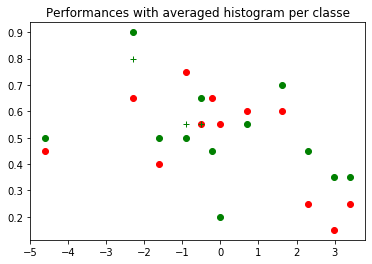

In [15]:
import matplotlib.pyplot as plt
for i in range(len(tauz)):
    j = np.log(tauz[i])
    plt.plot(j,BA_score_histav[i], 'r +')
    plt.plot(j,JS_score_histav[i], 'r o')
    plt.plot(j,BA_scorehom_histav[i], 'g +')
    plt.plot(j,JS_scorehom_histav[i], 'g o')
    plt.title('Performances with averaged histogram per classe')

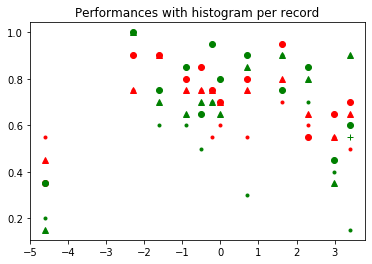

In [16]:
import matplotlib.pyplot as plt
for i in range(len(tauz)):
    j = np.log(tauz[i])
    plt.plot(j,BA_score[i], 'r +')
    plt.plot(j,JS_score[i], 'r o')
    plt.plot(j,kNN3_score[i], 'r ^')
    plt.plot(j,kNN6_score[i], 'r .')
    plt.plot(j,BA_scorehom[i], 'g +')
    plt.plot(j,JS_scorehom[i], 'g o')
    plt.plot(j,kNN3_scorehom[i], 'g ^')
    plt.plot(j,kNN6_scorehom[i], 'g .')
    plt.title('Performances with histogram per record')

poker
2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_True


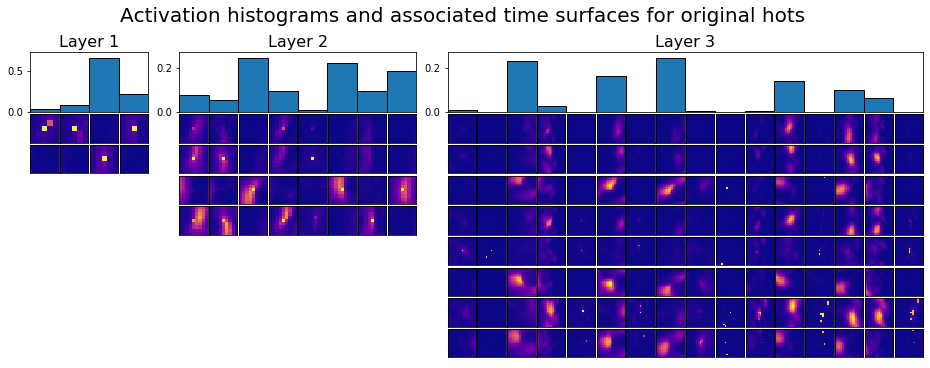

poker
2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.2, 2.0, 20.0]_[2, 4, 8]_True


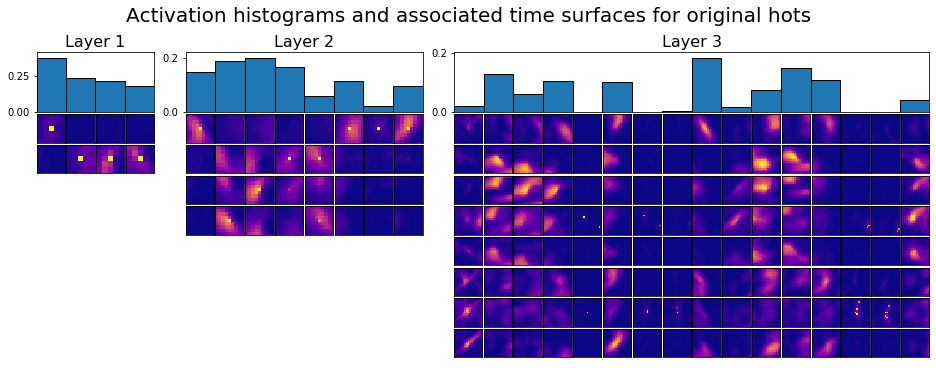

poker
2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.4, 4.0, 40.0]_[2, 4, 8]_True


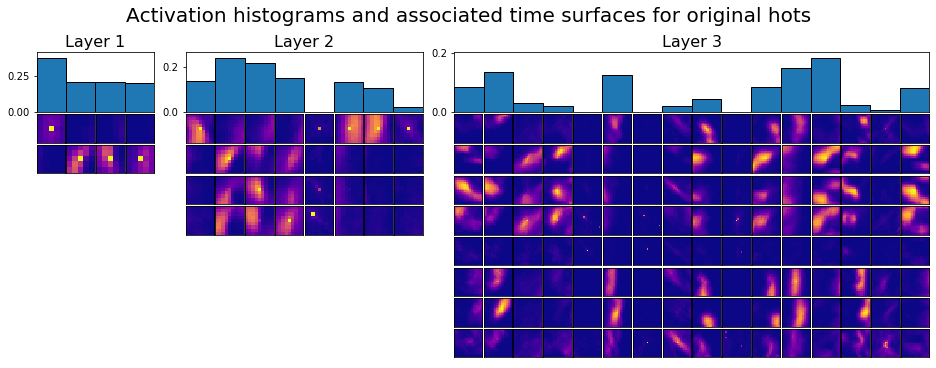

poker
2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.6, 6.0, 60.0]_[2, 4, 8]_True


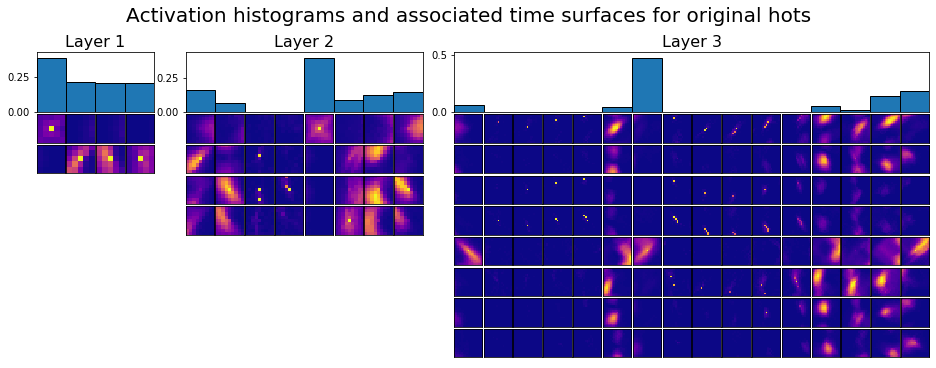

poker
2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.8, 8.0, 80.0]_[2, 4, 8]_True


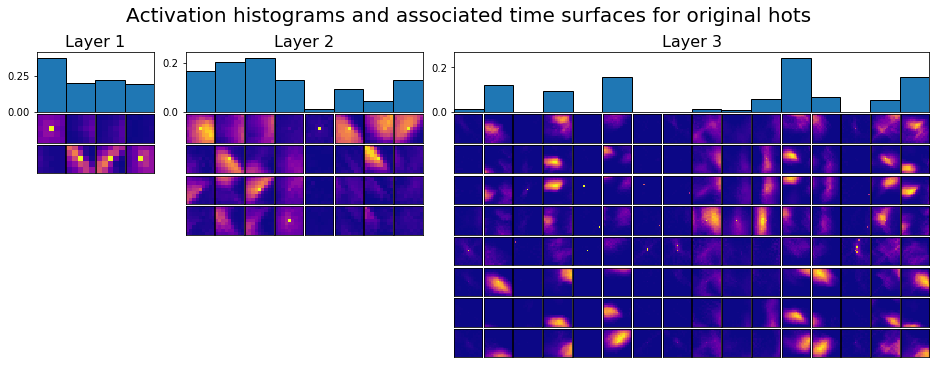

poker
2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[1.0, 10.0, 100.0]_[2, 4, 8]_True


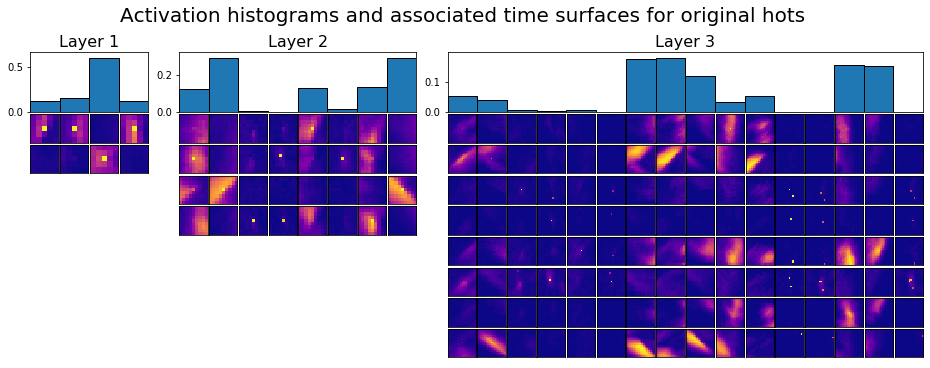

poker
2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[2.0, 20.0, 200.0]_[2, 4, 8]_True


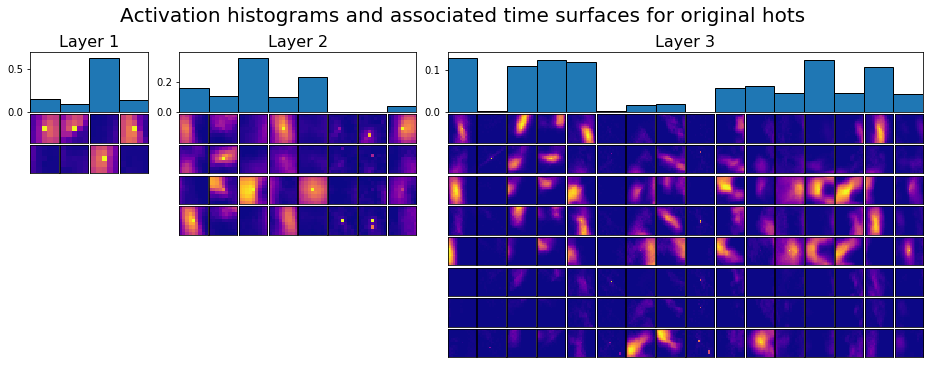

poker
2021-03-28_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_False


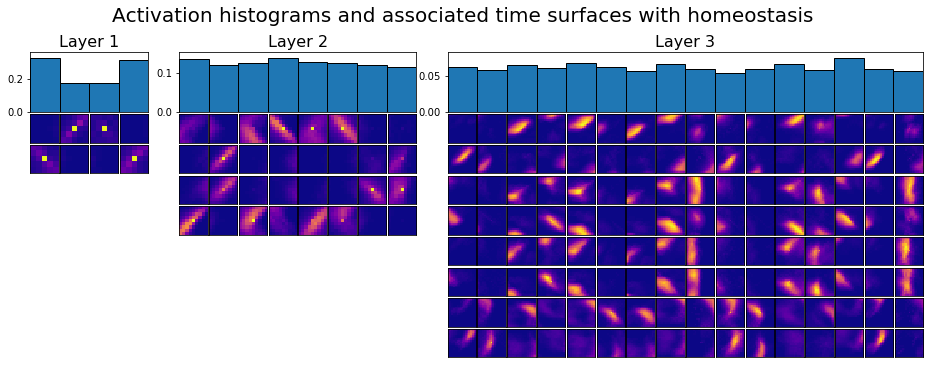

poker
2021-03-28_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[0.2, 2.0, 20.0]_[2, 4, 8]_False


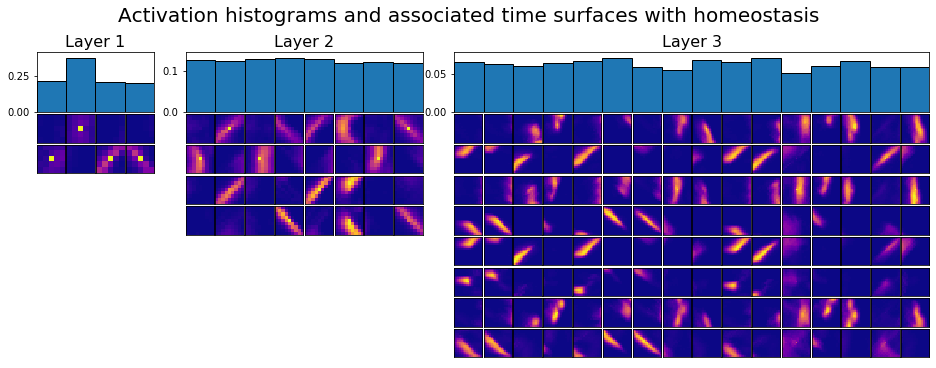

poker
2021-03-28_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[0.4, 4.0, 40.0]_[2, 4, 8]_False


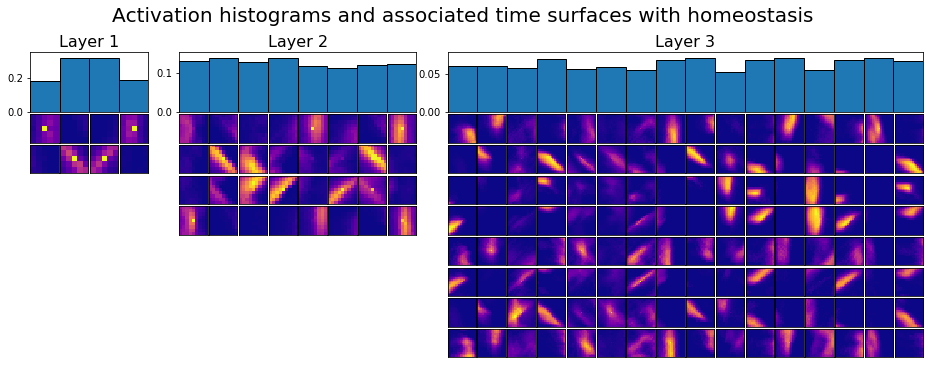

poker
2021-03-28_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[0.6, 6.0, 60.0]_[2, 4, 8]_False


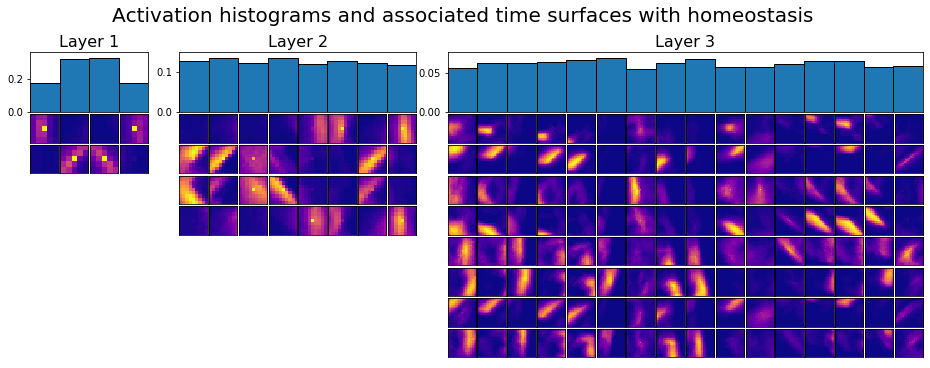

poker
2021-03-28_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[0.8, 8.0, 80.0]_[2, 4, 8]_False


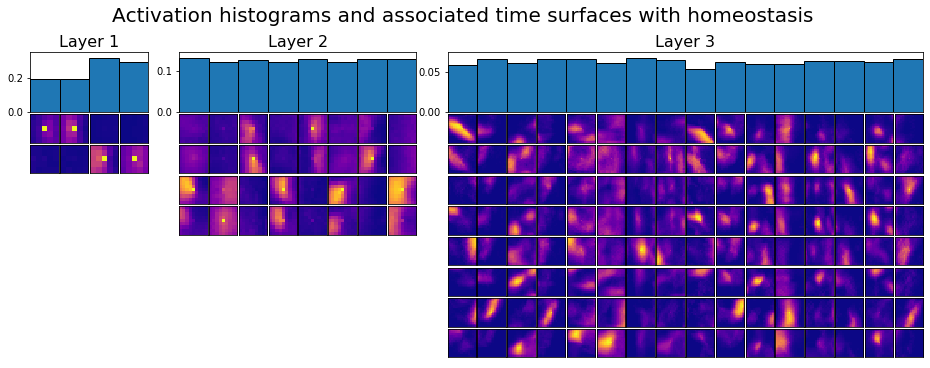

poker
2021-03-28_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[1.0, 10.0, 100.0]_[2, 4, 8]_False


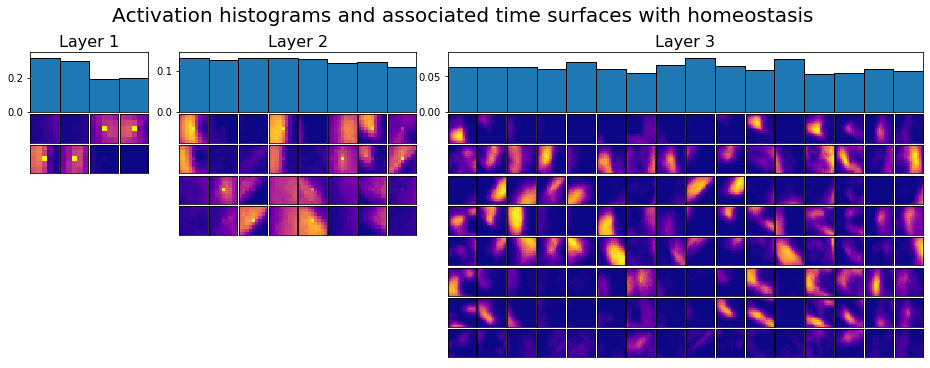

poker
2021-03-28_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[2.0, 20.0, 200.0]_[2, 4, 8]_False


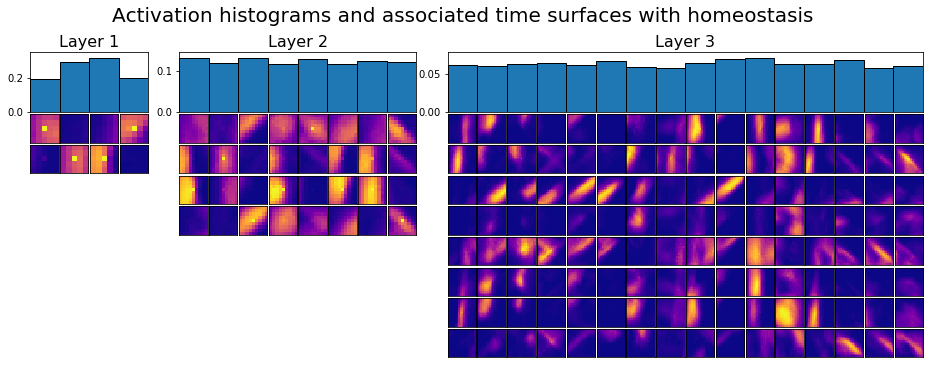

In [17]:
tauz = [0.1,0.2,0.4,0.6,0.8,1,2]

for name in ['hots', 'homhots']:
    for tau in tauz:
        hotshom, homeotest = netparam(name, filt, tau, nbclust, sigma, homeinv, jitter, timestr, dataset, R)#, nb_learn=50)
        hotshom.plotlayer()

# We choose tau = 0.1

poker
2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_True


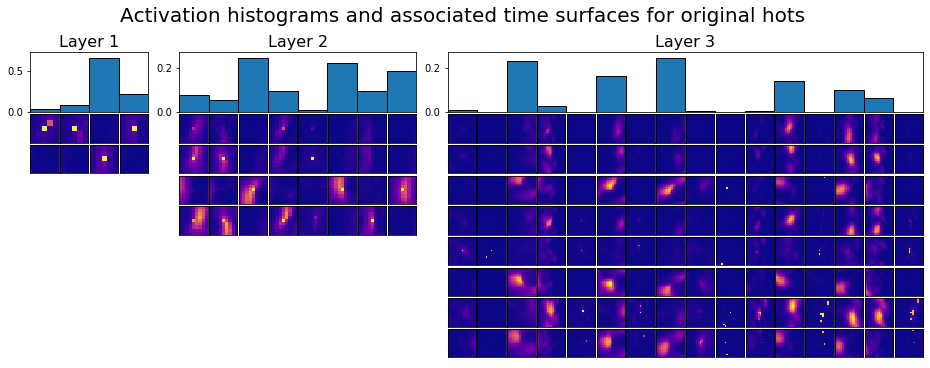

../Records/EXP_05_POKERDVS/train/2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_True_48_[None, None]_histo.pkl
../Records/EXP_05_POKERDVS/test/2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_True_20_[None, None]_histo.pkl
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 90.0% - eucli = 90.0% - norm = 90.0%
Classification scores with entropy: Kullback-Leibler = 85.0% - Jensen-Shannon = 90.0%
Classification scores with k-NN: 3-NN = 75.0% - 6-NN = 75.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_05_POKERDVS/train/2021-03-28_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_True_48_[None, None]_histav.pkl
-----------------------------------------------SCORES-----------------------------------------------
Classification sco

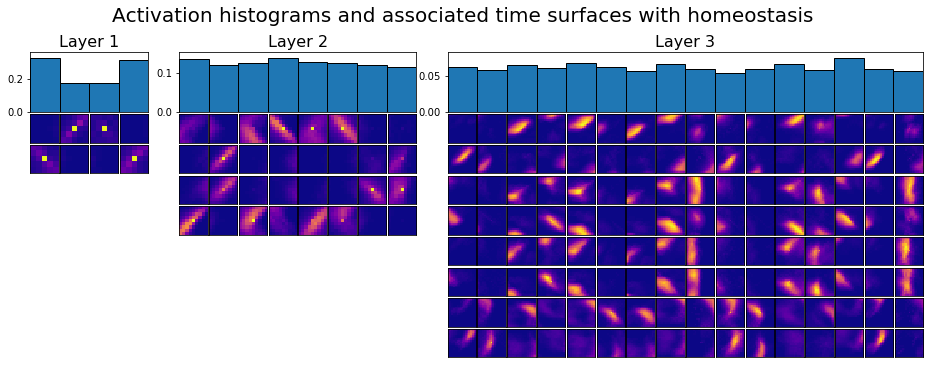

../Records/EXP_05_POKERDVS/train/2021-03-28_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_False_48_[None, None]_histo.pkl
../Records/EXP_05_POKERDVS/test/2021-03-28_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_False_20_[None, None]_histo.pkl
-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 100.0% - eucli = 100.0% - norm = 100.0%
Classification scores with entropy: Kullback-Leibler = 100.0% - Jensen-Shannon = 100.0%
Classification scores with k-NN: 3-NN = 100.0% - 6-NN = 100.0%
----------------------------------------------------------------------------------------------------
../Records/EXP_05_POKERDVS/train/2021-03-28_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_False_48_[None, None]_histav.pkl
-----------------------------------------------SCORES-----------------------------------------------
Classification sc

In [19]:
verbose = True
tau = 0.1
for name in ['hots', 'homhots']:
    hotshom, homeotest = netparam(name, filt, tau, nbclust, sigma, homeinv, jitter, timestr, dataset, R)#, nb_learn=50)
    hotshom.plotlayer()
    trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histo', dataset=dataset)
    testhistomap = hotshom.running(homeotest = homeotest, train=False, nb_digit=nb_test, jitonic=jitonic, dataset=dataset)
    score = histoscore(trainhistomap,testhistomap, verbose = verbose)
    trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histav', dataset=dataset)
    score = histoscore_lagorce(trainhistomap,testhistomap, verbose = verbose)

In [20]:
verbose=False
JS_score = []
JS_scorehom = []
JS_score_histav = []
JS_scorehom_histav = []
BA_score = []
BA_scorehom = []
BA_score_histav = []
BA_scorehom_histav = []
kNN6_score = []
kNN6_scorehom = []
kNN3_score = []
kNN3_scorehom = []

tau = 0.1

for name in ['hots', 'homhots']:
    for i in range(20):
        timestr = '2021-03-28'+str(i)
        hotshom, homeotest = netparam(name, filt, tau, nbclust, sigma, homeinv, jitter, timestr, dataset, R)#, nb_learn=50)
        trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histo', dataset=dataset)
        testhistomap = hotshom.running(homeotest = homeotest, train=False, nb_digit=nb_test, jitonic=jitonic, dataset=dataset)
        score = histoscore(trainhistomap,testhistomap, verbose = verbose)
        if name=='hots':
            BA_score.append(score[0])
            JS_score.append(score[4])
            kNN3_score.append(score[5])
            kNN6_score.append(score[6])
        else:
            BA_scorehom.append(score[0])
            JS_scorehom.append(score[4])
            kNN3_scorehom.append(score[5])
            kNN6_scorehom.append(score[6])
        trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histav', dataset=dataset)
        score = histoscore_lagorce(trainhistomap,testhistomap, verbose = verbose)
        if name=='hots':
            BA_score_histav.append(score[0])
            JS_score_histav.append(score[4])
        else:
            BA_scorehom_histav.append(score[0])
            JS_scorehom_histav.append(score[4])

  5%|▌         | 2/40 [00:00<00:02, 14.75it/s]

poker
2021-03-280_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[0.1, 1.0, 10.0]_[2, 4, 8]_True
no jitter
sensor formatting...


 70%|███████   | 28/40 [00:12<00:04,  2.60it/s]

KeyboardInterrupt: 